<a href="https://colab.research.google.com/github/Xeoyeon/6th-Intermediate/blob/Week10/pytorch_tut_forDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
print(os.listdir("/content/drive/MyDrive/digit-recognizer"))

['sample_submission.csv', 'train.csv', 'test.csv']


# Basics of Pytorch

In [3]:
import numpy as np

array = [[1,2,3],[4,5,6]] #list
first_array = np.array(array) #numpy 배열로 변환=> 벡터화된 연산을 위해
print("array type : {}".format(type(first_array)))
print("array shape :{}".format(np.shape(first_array)))
print(first_array)

array type : <class 'numpy.ndarray'>
array shape :(2, 3)
[[1 2 3]
 [4 5 6]]


In [4]:
import torch
tensor = torch.Tensor(array) #torch.Tensor() 로 tensor 생성
print("array type :{}".format(tensor.type))
print("array shape : {}".format(tensor.shape))
print(tensor)

array type :<built-in method type of Tensor object at 0x788f6438de40>
array shape : torch.Size([2, 3])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [11]:
# numpy ones
print("Numpy {}\n".format(np.ones((2,3))))
# pytorch ones
print(torch.ones((2,3)))

# numpy random
print("Numpy {}\n".format(np.random.rand(2,3)))
# pytorch random
print(torch.rand(2,3))

Numpy [[1. 1. 1.]
 [1. 1. 1.]]

tensor([[1., 1., 1.],
        [1., 1., 1.]])
Numpy [[0.38692644 0.88568538 0.72527546]
 [0.79217671 0.31838287 0.37968606]]

tensor([[0.7860, 0.8216, 0.1829],
        [0.1034, 0.2987, 0.7549]])


# conversion btw numpy, tensor
- numpy-> tensor : torch.from_numpy()
- tensor-> numpy : tensor.numpy()

In [12]:
array = np.random.rand(2,2)
print("{} {}\n".format(type(array),array))

from_numpy_to_tensor = torch.from_numpy(array)
print("{}\n".format(from_numpy_to_tensor))

tensor = from_numpy_to_tensor
from_tensor_to_numpy = tensor.numpy()
print("{} {}\n".format(type(from_tensor_to_numpy),from_tensor_to_numpy))

<class 'numpy.ndarray'> [[0.81348435 0.2220867 ]
 [0.95435439 0.14463336]]

tensor([[0.8135, 0.2221],
        [0.9544, 0.1446]], dtype=torch.float64)

<class 'numpy.ndarray'> [[0.81348435 0.2220867 ]
 [0.95435439 0.14463336]]



# Basic Math with Pytorch
- Resize: view()
- a and b are tensor.
- Addition: torch.add(a,b) = a + b
- Subtraction: a.sub(b) = a - b
- Element wise multiplication: torch.mul(a,b) = a * b
- Element wise division: torch.div(a,b) = a / b
- Mean: a.mean()
- Standart Deviation (std): a.std()

In [13]:
# create tensor
tensor=torch.ones(3,3)
print("\n",tensor)

# resize => view
print("{}{}\n".format(tensor.view(9).shape, tensor.view(9)))

# addition => add
print("addition : {}\n".format(torch.add(tensor,tensor)))

# subtraction => sub
print("subtraction ; {}\n".format(tensor.sub(tensor)))

# elementwise multiplication => mul
print("elementwise multiplication : {}\n".format(torch.mul(tensor,tensor)))

# mean => mean
tensor= torch.Tensor([1,2,3,4,5])
print("mean : {}".format(tensor.mean()))

# standard deviation => std
print("std : {}".format(tensor.std()))


 tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
torch.Size([9])tensor([1., 1., 1., 1., 1., 1., 1., 1., 1.])

addition : tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])

subtraction ; tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

elementwise multiplication : tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

mean : 3.0
std : 1.5811388492584229


# Variables
Difference between variables and tensor is variable accumulates gradients.
Variable 클래스는 텐서에 대한 래퍼(wrapper) 역할을 하며, 텐서의 값 뿐만 아니라 그래디언트(gradient)를 저장할 수 있도록 함.

In [14]:
from torch.autograd import Variable
var = Variable(torch.ones(3), requires_grad =True) #requires_grad=True로 설정되어 있으므로, 이 변수에 대한 연산은 추적되어 그래디언트가 계산됨.
var

tensor([1., 1., 1.], requires_grad=True)

In [15]:
# basic back prop
array =[2,4]
tensor = torch.Tensor(array)
x = Variable(tensor, requires_grad =True)
y = x**2
print("y= ",y)

o = (1/2)*sum(y)
print("o = ", o)

o.backward() # 함수 o에 대한 gradient 연산

print("gradients : ",x.grad) # grad로 gradient 확인

y=  tensor([ 4., 16.], grad_fn=<PowBackward0>)
o =  tensor(10., grad_fn=<MulBackward0>)
gradients :  tensor([2., 4.])


# Linear Regression
# what will be number of car sell if the car price is 100$?
- For example, we have car company. If the car price is low, we sell more car. If the car price is high, we sell less car. This is the fact that we know and we have data set about this fact.
- The question is that what will be number of car sell if the car price is 100.

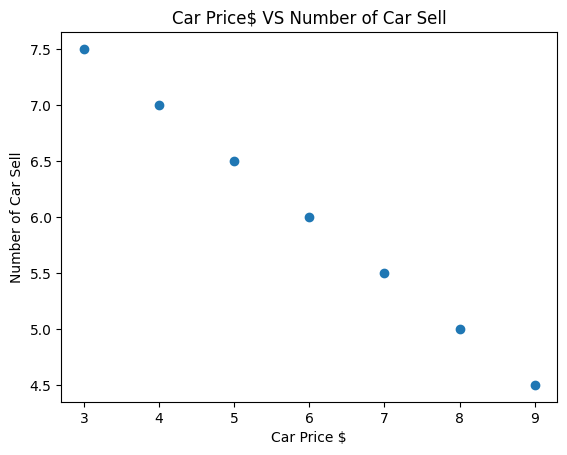

In [16]:
# As a car company we collect this data from previous selling
# lets define car prices
car_prices_array =[3,4,5,6,7,8,9]
car_price_np = np.array(car_prices_array, dtype=np.float32)
car_price_np = car_price_np.reshape(-1,1)
car_price_tensor = Variable(torch.from_numpy(car_price_np))

# lets define number of car sell
number_of_car_sell_array = [ 7.5, 7, 6.5, 6.0, 5.5, 5.0, 4.5]
number_of_car_sell_np = np.array(number_of_car_sell_array,dtype=np.float32)
number_of_car_sell_np = number_of_car_sell_np.reshape(-1,1)
number_of_car_sell_tensor = Variable(torch.from_numpy(number_of_car_sell_np))

# lets visualize our data
import matplotlib.pyplot as plt
plt.scatter(car_prices_array,number_of_car_sell_array)
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Car Price$ VS Number of Car Sell")
plt.show()


Steps of Linear Regression
1. create LinearRegression class
2. define model from this LinearRegression class
3. MSE: Mean squared error
4. Optimization (SGD:stochastic gradient descent)
5. Backpropagation
6. Prediction

<generator object Module.parameters at 0x788f63887760>
epoch 0, loss 19.91067123413086
epoch 50, loss 5.06667423248291
epoch 100, loss 3.4237637519836426
epoch 150, loss 2.3135812282562256
epoch 200, loss 1.5633842945098877
epoch 250, loss 1.0564438104629517
epoch 300, loss 0.7138828039169312
epoch 350, loss 0.4824008047580719
epoch 400, loss 0.3259783685207367
epoch 450, loss 0.22027739882469177
epoch 500, loss 0.14885064959526062
epoch 550, loss 0.10058476775884628
epoch 600, loss 0.06796903908252716
epoch 650, loss 0.04592928662896156
epoch 700, loss 0.03103659860789776
epoch 750, loss 0.02097230963408947
epoch 800, loss 0.01417213398963213
epoch 850, loss 0.00957680493593216
epoch 900, loss 0.006471441127359867
epoch 950, loss 0.004373073112219572
epoch 1000, loss 0.0029549214523285627


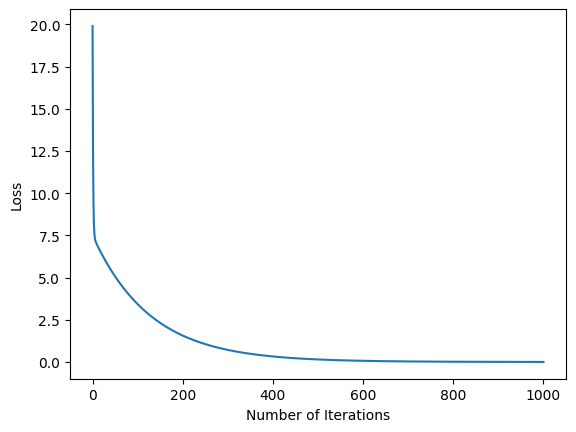

In [21]:
# pytorch로 linear regression을 구현해보자.
import torch
from torch.autograd import Variable
import torch.nn as nn
import warnings
warnings.filterwarnings("ignore")

# create class
class LinearRegression(nn.Module):
  # nn.Module : 신경망 모델을 구축하기 위한 기본 클래스
  #__init__ 메서드에서 모델의 구조를 정의하고, forward 메서드에서 입력을 받아 출력을 계산하는 방식으로 모델을 정의
  def __init__(self, input_size, output_size):
    # super 함수를 통해서 우리는 nn.Module을 상속받아 모든 값에 접근가능
    super(LinearRegression,self).__init__()
    self.linear = nn.Linear(input_dim, output_dim)

  def forward(self, x):
    return self.linear(x)


#define model, optimizer, MSE
input_dim =1
output_dim =1
model = LinearRegression(input_dim, output_dim)

mse = nn.MSELoss()

learning_rate = 0.02
print(model.parameters())
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

#train model
loss_list = []
iteration_num = 1001
for iteration in range(iteration_num):
  #optimization
  optimizer.zero_grad() #모든 매개변수의 gradient를 0으로 초기화.역전파 수행 전 호출

  #forward
  results = model(car_price_tensor)

  #cal loss
  loss = mse(results, number_of_car_sell_tensor)

  #back prop
  loss.backward() #backward 메소드 : 자동으로 gradient를 계산

  #update param
  optimizer.step() #step 메소드 : 이 gradient를 사용하여 매개변수 업데이트

  #store loss
  loss_list.append(loss.data) #매 iteration마다 계산된 loss값을 loss_list 리스트에 저장.

  #print loss
  if(iteration % 50 ==0) :#50번째 반복마다 loss 출력
    print("epoch {}, loss {}".format(iteration, loss.data))

plt.plot(range(iteration_num),loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.show()

자동차의 가격이 10$라면, 몇개의 자동차가 팔릴 것인지 예측해보자.

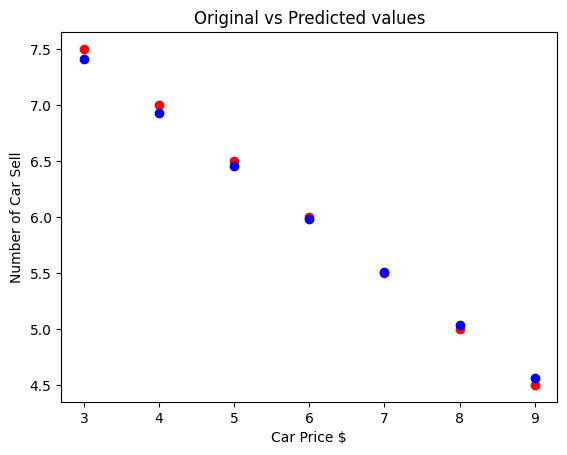

In [22]:
# car price 예측
predicted = model(car_price_tensor).data.numpy()
plt.scatter(car_prices_array,number_of_car_sell_array,label = "original data",color ="red")
plt.scatter(car_prices_array,predicted,label = "predicted data",color ="blue")

plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Original vs Predicted values")
plt.show()

# Logistic Regression
Steps of Logistic Regression
1. Import Libraries
2. Prepare Dataset
3. Create Logistic Regression Model
4. Instantiate Model
5. Instantiate Loss
6. Instantiate Optimizer
7. Train the model
8. Predict

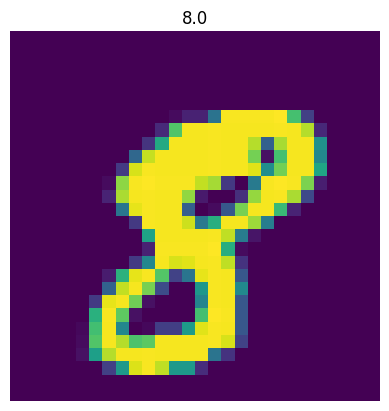

In [23]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.read_csv(r"/content/drive/MyDrive/digit-recognizer/train.csv",dtype = np.float32)

# split data into features(pixels) and labels(numbers from 0 to 9)
targets_numpy = train.label.values
features_numpy = train.loc[:,train.columns != "label"].values/255

# train test split.
features_train, features_test, targets_train, targets_test = train_test_split(features_numpy,
                                                                             targets_numpy,
                                                                             test_size = 0.2,
                                                                             random_state = 42)
# create Tensor(features, targets) for train, test set
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor)
featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor)

# batch_size, epoch and iteration
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

# TensorDataset 클래스를 통해 dataset의 형태로 변환.
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# data loader- minibatch로 분할 후 각각을 순회하며 데이터를 load
train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

# visualize one of the images in data set
plt.imshow(features_numpy[10].reshape(28,28))
plt.axis("off")
plt.title(str(targets_numpy[10]))
plt.savefig('graph.png')
plt.show()


In [24]:
# Logistic Regression model 만들기
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__() #부모 클래스인 nn.Module의 생성자 호출
        # Linear part
        self.linear = nn.Linear(input_dim, output_dim)
        #로지스틱 함수는 파이토치의 손실 함수(loss function)에 있기 때문에 모델의 정의 부분에는 로지스틱 함수를 직접 추가하지 않음

    def forward(self, x):
        out = self.linear(x)
        return out

# Instantiate Model Class
input_dim = 28*28 # size of image px*px
output_dim = 10  # labels 0,1,2,3,4,5,6,7,8,9

# create logistic regression model
model = LogisticRegressionModel(input_dim, output_dim)

# Cross Entropy Loss
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


In [25]:
# Traning the Model
count = 0
loss_list = []
iteration_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader): #훈련 데이터셋에서 미니배치를 반복.

        # Define variables
        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)

        # Clear gradients
        optimizer.zero_grad()

        # Forward propagation
        outputs = model(train)

        # Calculate softmax and cross entropy loss
        loss = error(outputs, labels)

        # Calculate gradients
        loss.backward()

        # Update parameters
        optimizer.step()

        count += 1

        # Prediction
        if count % 50 == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            # Predict test dataset
            for images, labels in test_loader:
                test = Variable(images.view(-1, 28*28))

                # Forward propagation
                outputs = model(test)

                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]

                # Total number of labels
                total += len(labels)

                # Total correct predictions
                correct += (predicted == labels).sum()

            accuracy = 100 * correct / float(total)

            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {}%'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 1.8167015314102173  Accuracy: 71.0952377319336%
Iteration: 1000  Loss: 1.6115820407867432  Accuracy: 77.48809814453125%
Iteration: 1500  Loss: 1.294683814048767  Accuracy: 79.8452377319336%
Iteration: 2000  Loss: 1.1892850399017334  Accuracy: 81.0952377319336%
Iteration: 2500  Loss: 1.0413743257522583  Accuracy: 81.80952453613281%
Iteration: 3000  Loss: 0.9306676983833313  Accuracy: 82.46428680419922%
Iteration: 3500  Loss: 0.8992717266082764  Accuracy: 82.97618865966797%
Iteration: 4000  Loss: 0.7458301782608032  Accuracy: 83.39286041259766%
Iteration: 4500  Loss: 0.9708584547042847  Accuracy: 83.78571319580078%
Iteration: 5000  Loss: 0.8094210028648376  Accuracy: 84.17857360839844%
Iteration: 5500  Loss: 0.741343080997467  Accuracy: 84.44047546386719%
Iteration: 6000  Loss: 0.8648481965065002  Accuracy: 84.78571319580078%
Iteration: 6500  Loss: 0.6494526863098145  Accuracy: 85.04762268066406%
Iteration: 7000  Loss: 0.7122837901115417  Accuracy: 85.21428680419922

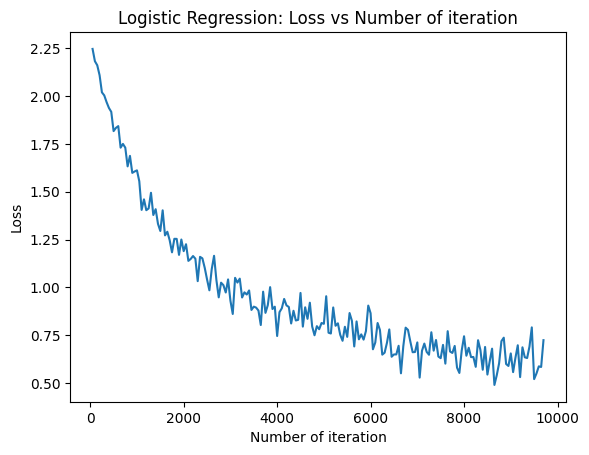

In [26]:
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("Logistic Regression: Loss vs Number of iteration")
plt.show()

# ANN(Artificial Neural Network)

In [27]:
import torch
import torch.nn as nn
from torch.autograd import Variable

# Create ANN Model
class ANNModel(nn.Module):

    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()

        # Linear function 1: 784 --> 150
        self.fc1 = nn.Linear(input_dim, hidden_dim) # 신경망의 첫 번째 선형 레이어(linear layer)를 정의
        # Non-linearity 1
        self.relu1 = nn.ReLU()

        # Linear function 2: 150 --> 150
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        self.tanh2 = nn.Tanh()

        # Linear function 3: 150 --> 150
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 3
        self.elu3 = nn.ELU()

        # Linear function 4 (readout): 150 --> 10
        self.fc4 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.relu1(out)

        # Linear function 2
        out = self.fc2(out)
        # Non-linearity 2
        out = self.tanh2(out)

        # Linear function 2
        out = self.fc3(out)
        # Non-linearity 2
        out = self.elu3(out)

        # Linear function 4 (readout)
        out = self.fc4(out)
        return out

# instantiate ANN
input_dim = 28*28
hidden_dim = 150 #그냥 아무 값으로 설정한것. 이유없음.
output_dim = 10

# Create ANN
model = ANNModel(input_dim, hidden_dim, output_dim)

# Cross Entropy Loss
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [28]:
# ANN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)

        # Clear gradients
        optimizer.zero_grad()

        # Forward propagation
        outputs = model(train)

        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)

        # Calculating gradients
        loss.backward()

        # Update parameters
        optimizer.step()

        count += 1

        if count % 50 == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            # Predict test dataset
            for images, labels in test_loader:

                test = Variable(images.view(-1, 28*28))

                # Forward propagation
                outputs = model(test)

                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]

                # Total number of labels
                total += len(labels)

                # Total correct predictions
                correct += (predicted == labels).sum()

            accuracy = 100 * correct / float(total)

            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 0.7881891131401062  Accuracy: 79.82142639160156 %
Iteration: 1000  Loss: 0.46243220567703247  Accuracy: 87.53571319580078 %
Iteration: 1500  Loss: 0.2196088582277298  Accuracy: 89.41666412353516 %
Iteration: 2000  Loss: 0.28202563524246216  Accuracy: 90.71428680419922 %
Iteration: 2500  Loss: 0.3074209988117218  Accuracy: 92.17857360839844 %
Iteration: 3000  Loss: 0.11366114765405655  Accuracy: 92.95237731933594 %
Iteration: 3500  Loss: 0.23533187806606293  Accuracy: 93.72618865966797 %
Iteration: 4000  Loss: 0.060787301510572433  Accuracy: 94.17857360839844 %
Iteration: 5000  Loss: 0.09657428413629532  Accuracy: 94.85713958740234 %
Iteration: 5500  Loss: 0.1944964975118637  Accuracy: 95.03571319580078 %
Iteration: 6000  Loss: 0.18035419285297394  Accuracy: 95.32142639160156 %
Iteration: 6500  Loss: 0.10941893607378006  Accuracy: 95.54762268066406 %
Iteration: 7000  Loss: 0.10976611822843552  Accuracy: 96.04762268066406 %
Iteration: 7500  Loss: 0.10468393564224243

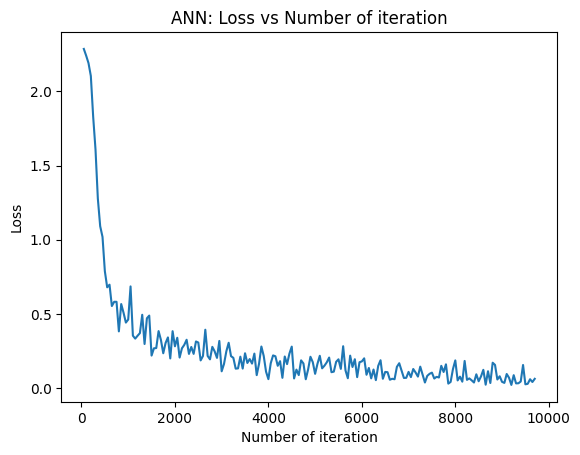

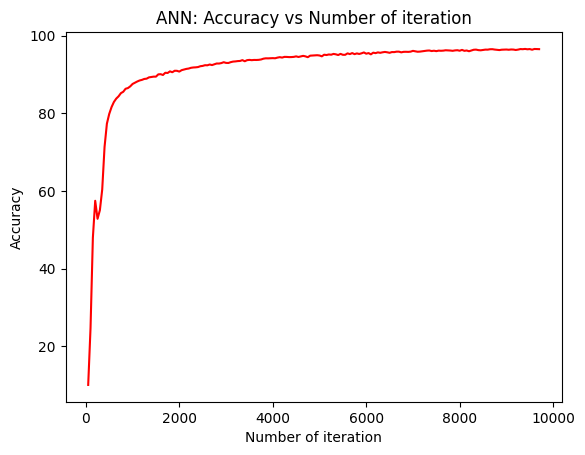

In [29]:
# visualization loss
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()

# visualization accuracy
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()